In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [7]:
vec_nu_i = np.array([0.005, 0.01, 0.02])
vec_tauE_label = ["5", "10", "20"]
vec_alpha = np.linspace(0, 1, 100)

df_nu = pd.DataFrame({'alpha':vec_alpha,
					vec_nu_i[0]:np.zeros_like(vec_alpha),
					vec_nu_i[1]:np.zeros_like(vec_alpha),
					vec_nu_i[2]:np.zeros_like(vec_alpha)})
		

In [8]:
n = 30000

for nu_i in vec_nu_i:
	print(nu_i, end='\t')
	for i, alpha in enumerate(vec_alpha):
		print(i, end=' ')
		model_type = mt.MFExpInterpolatedCoBaIF(alpha_val = alpha,
					EL_val = -60,
					ET_val = -43,
					EF_val = 0,
					ES_val = 0,
					EI_val = -80,
					nuF_val = nu_i,
					nuS_val = nu_i,
					nuI_val = nu_i,
					wF_val = 0.1,
					wS_val = 0.1,
					wI_val = 0.4,
					tauF_val = 1,
					tauS_val = 100,
					tauI_val = 10,
					KF_val = 400,
					KS_val = 400,
					KI_val = 100,
					Vth_val= -43 + 5,
					Vr_val = -60,
					tauL_val = 20,
					tauR_val = 2,
					deltaT_val = 1
				)

		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[3]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu[nu_i][i] = FP_model.calculate_firing_rate(vec_Vk)
	
	print()

0.005	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:180: RuntimeWarning: overflow encountered in double_scalars
  vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)


19 20 21 22 23 24 25 26 27 28 29 

/home/marcelo/miniconda3/envs/worklab/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 

/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:180: RuntimeWarning: invalid value encountered in double_scalars
  vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)


58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.01	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 

/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:180: RuntimeWarning: overflow encountered in exp
  vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)


65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.02	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [9]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_iRate_Exponential_interpolated.dat", index_col=0)
# df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_ta_iRate.dat", index_col=0)
# df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_ta_iRate.dat", index_col=0)

df_nu_sim_read

,alpha,5,10,20
0,0.000000,0.0,0.0,0.0
1,0.020408,0.0,0.0,0.0
2,0.040816,0.4,0.0,0.0
3,0.061224,2.7,2.7,2.8
4,0.081633,16.7,27.7,39.2
5,0.102041,40.7,96.0,150.2
6,0.122449,77.0,147.6,233.8
7,0.142857,109.1,190.6,283.9
8,0.163265,138.6,226.7,312.9
9,0.183673,161.9,248.5,336.8


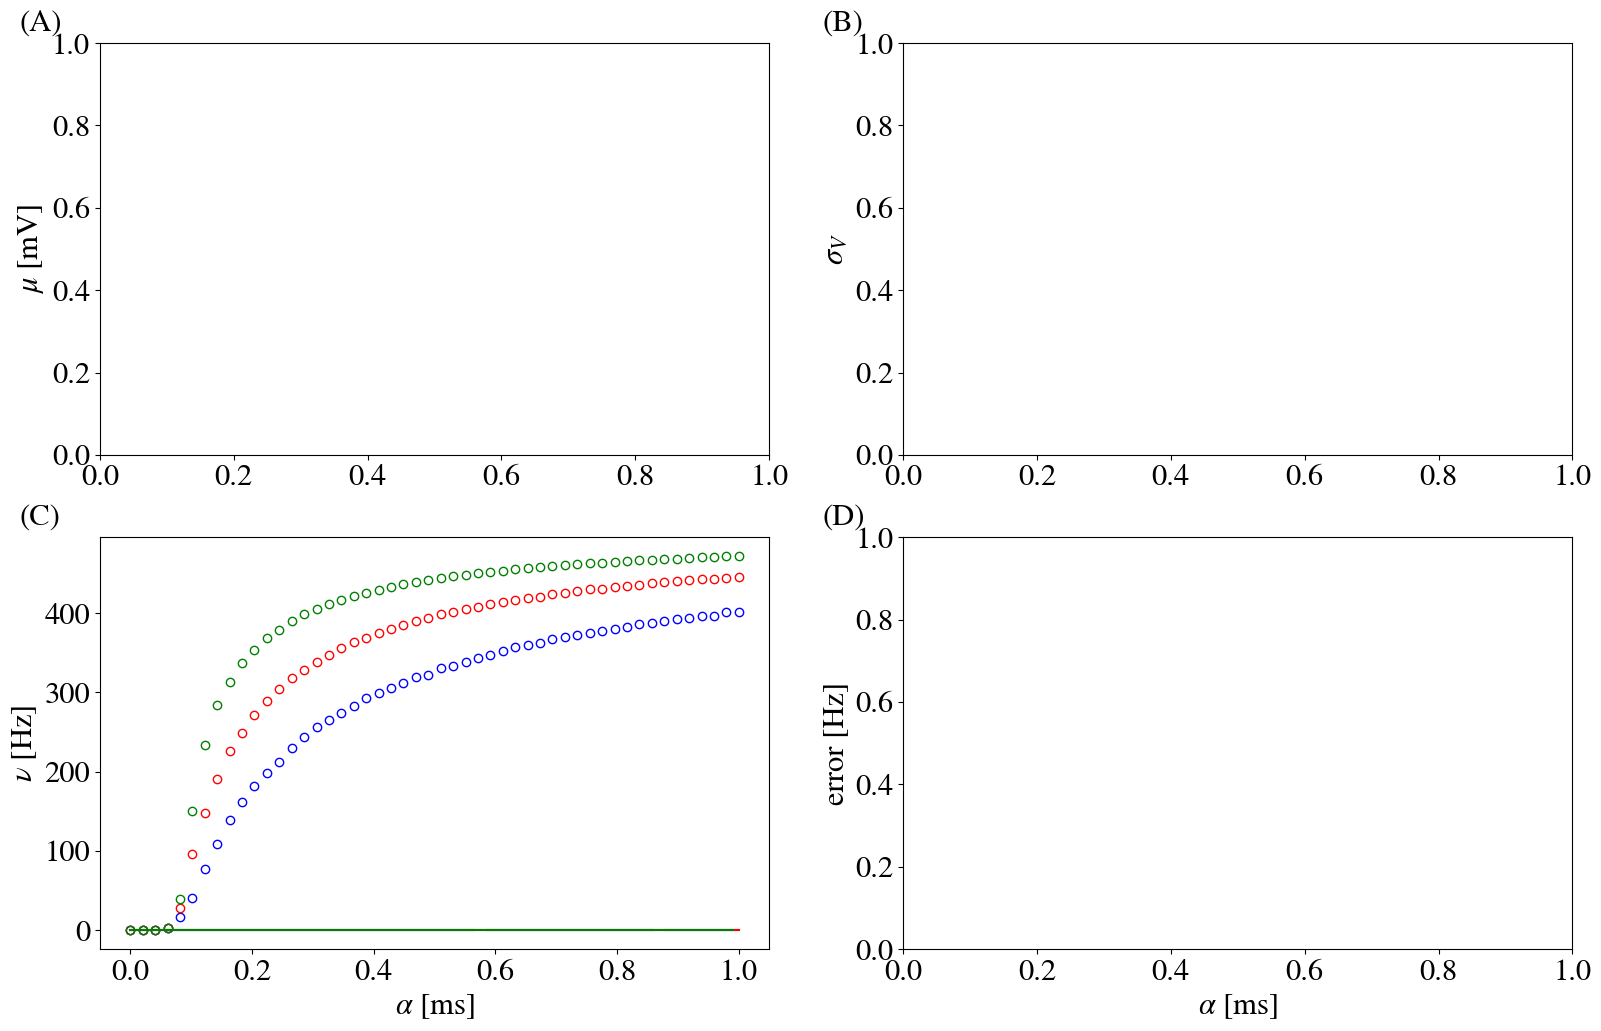

In [11]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\alpha$ [ms]')
axs[1][1].set_xlabel(r'$\alpha$ [ms]')
axs[0][0].set_ylabel(r'$\mu$ [mV]')
axs[0][1].set_ylabel(r'$\sigma_V$')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel('error [Hz]')

# axs[0][0].plot(vec_alpha, df_mu[vec_nu_i[0]], 'b-', label='input = 5Hz')
# axs[0][0].plot(df_mu_sim['alpha'][index], df_mu_sim[vec_nu_i[0]][index], 'bo', markerfacecolor='none')
# axs[0][0].plot(vec_alpha, df_mu[vec_nu_i[1]], 'r-', label='input = 10Hz')
# axs[0][0].plot(df_mu_sim['alpha'][index], df_mu_sim[vec_nu_i[1]][index], 'ro', markerfacecolor='none')
# axs[0][0].plot(vec_alpha, df_mu[vec_nu_i[2]], 'g-', label='input = 20Hz')
# axs[0][0].plot(df_mu_sim['alpha'][index], df_mu_sim[vec_nu_i[2]][index], 'go', markerfacecolor='none')

# axs[0][1].plot(vec_alpha, df_sigma_V[vec_nu_i[0]]**2/2, 'b-')
# axs[0][1].plot(df_sigma_V_sim['alpha'][index], df_sigma_V_sim[vec_nu_i[0]][index], 'bo', markerfacecolor='none')
# axs[0][1].plot(vec_alpha, df_sigma_V[vec_nu_i[1]]**2/2, 'r-')
# axs[0][1].plot(df_sigma_V_sim['alpha'][index], df_sigma_V_sim[vec_nu_i[1]][index], 'ro', markerfacecolor='none')
# axs[0][1].plot(vec_alpha, df_sigma_V[vec_nu_i[2]]**2/2, 'g-')
# axs[0][1].plot(df_sigma_V_sim['alpha'][index], df_sigma_V_sim[vec_nu_i[2]][index], 'go', markerfacecolor='none')

axs[1][0].plot(vec_alpha, df_nu[vec_nu_i[0]]*1000, 'b-')
axs[1][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['5'], 'bo', markerfacecolor='none')
axs[1][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['10'], 'ro', markerfacecolor='none')
axs[1][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['20'], 'go', markerfacecolor='none')
axs[1][0].plot(vec_alpha, df_nu[vec_nu_i[1]]*1000, 'r-')
# axs[1][0].plot(vec_alpha, df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(vec_alpha, df_nu[vec_nu_i[2]]*1000, 'g-')
# axs[1][0].plot(vec_alpha, df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

# axs[1][1].plot(vec_alpha, df_error[vec_nu_i[0]], 'b-')
# axs[1][1].plot(vec_alpha, df_error[vec_nu_i[1]], 'r-')
# axs[1][1].plot(vec_alpha, df_error[vec_nu_i[2]], 'g-')
# fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})


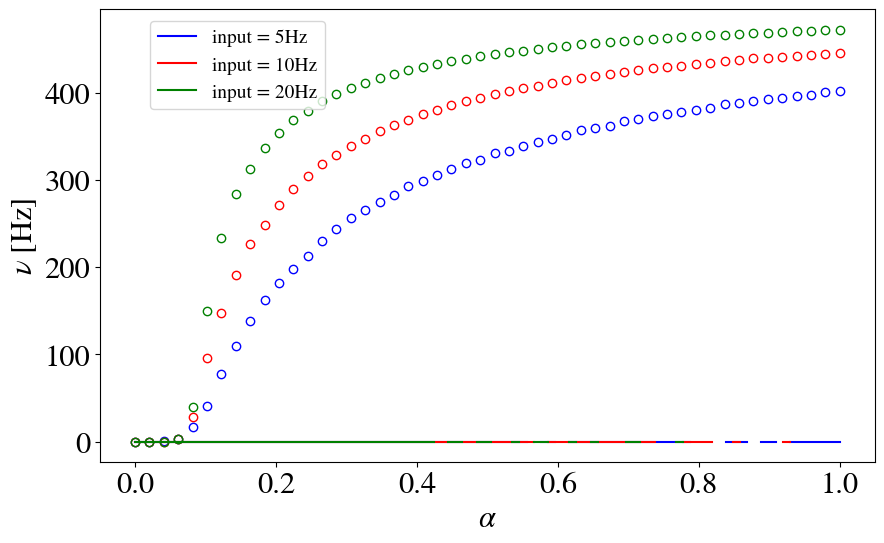

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(10,6), dpi=100, squeeze=False)
axs[0][0].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')

# axs[0][0].set_ylim(-25,400)

axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[0]]*1000, 'b-', label='input = 5Hz')
axs[0][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['5'], 'bo', markerfacecolor='none')
axs[0][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['10'], 'ro', markerfacecolor='none')
axs[0][0].plot(df_nu_sim_read['alpha'], df_nu_sim_read['20'], 'go', markerfacecolor='none')
axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[1]]*1000, 'r-', label='input = 10Hz')
axs[0][0].plot(vec_alpha, df_nu[vec_nu_i[2]]*1000, 'g-', label='input = 20Hz')

fig.legend(bbox_to_anchor=(0.35, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

In [18]:
Analitic_data_path = "../../Data/Analitic_data/"

df_nu.to_csv(f"{Analitic_data_path}firing_rate_iRate_fullNMDA_rate.dat")

In [12]:
df_nu

,alpha,0.005,0.01,0.02
0,0.000000,-9.424322e-56,-6.326165e-62,-3.896096e-99
1,0.010101,-6.929285e-50,-5.106443e-73,-1.489060e-120
2,0.020202,-1.748628e-59,-5.695239e-95,-8.435118e-151
3,0.030303,-7.050894e-70,-1.777394e-118,-2.571288e-184
4,0.040404,-4.493190e-82,-1.340646e-133,-2.902657e-235
...,...,...,...,...
95,0.959596,-0.000000e+00,-0.000000e+00,-0.000000e+00
96,0.969697,-0.000000e+00,-0.000000e+00,-0.000000e+00
97,0.979798,-0.000000e+00,-0.000000e+00,-0.000000e+00
98,0.989899,-0.000000e+00,-0.000000e+00,-0.000000e+00


In [11]:
df_firing_rate_ta = pd.read_csv('firing_rate_iRate.dat', index_col=0)
df_firing_rate_ta['5'][14]

4.35

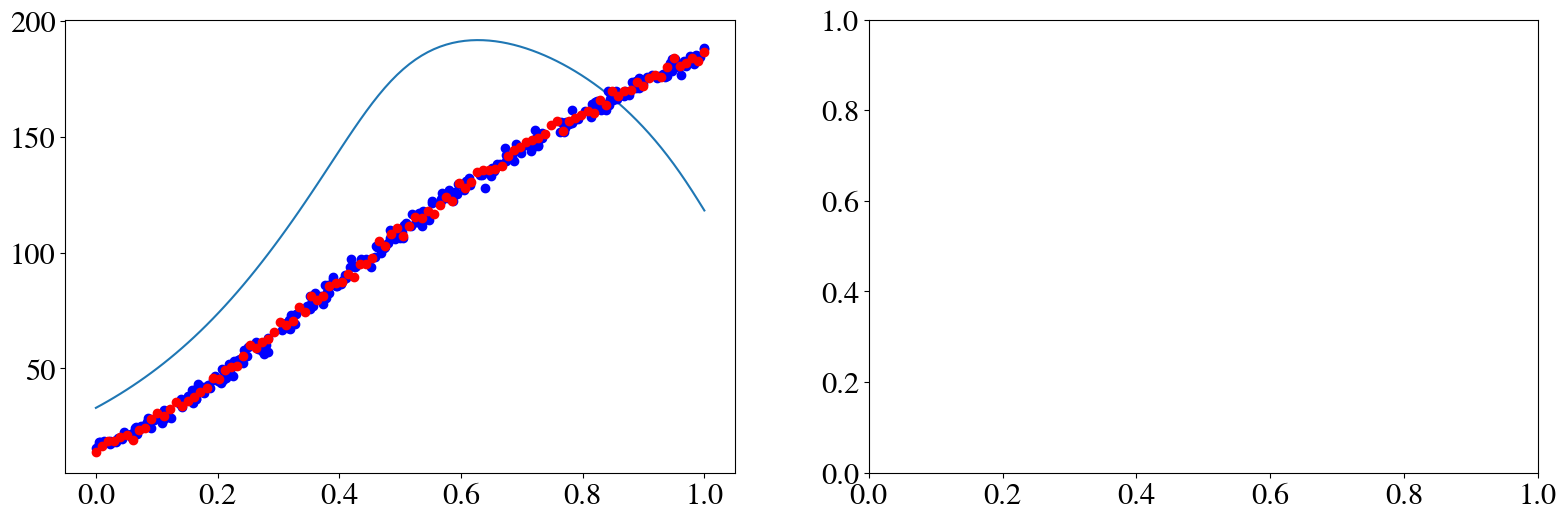

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100)

# axs[0].set_ylim(0,0.5)
axs[0].plot(vec_alpha, dic_nu_ta[0.005]*1000)
axs[0].plot(df_firing_rate['alpha (nu=5)'], df_firing_rate['5'], 'bo')
axs[0].plot(df_firing_rate1['alpha'], df_firing_rate1['5'], 'ro')
# axs[0].plot(vec_alpha, sigmaV[0.005]**2/2)
# axs[0].plot(df_var_V['alpha (nu=5)'], df_var_V['5'], 'bo')